In [46]:
from sklearn.model_selection import train_test_split
import torch
from data_prep import ready_data,feature_label,exit_Xy
import numpy as np
import matplotlib.pyplot as plt



In [47]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [49]:
feature = 10
dataset,df = ready_data(feature,device,ms=200)

(35836, 10, 9)


ValueError: not enough values to unpack (expected 3, got 2)

In [6]:
from dl import Baseline,Bl,THdLin,three_layer,up_three_layer

In [21]:
in_,out_ = dataset['train_input'].shape[1],dataset['train_label'].shape[1]

#model = Baseline(in_dim = in_,out_dim = out_,embed_dim = 64,num_heads = 8,hidden_dim = 64,device=device)
#model = Bl(in_, out_,hid = 128,hid2 = 32,device=device)
model = up_three_layer(in_, out_,hid = 256,hid2 = 512,hid3= 256,device=device)

In [22]:
X,y = dataset['train_input'],dataset['train_label']
X_t,y_t = dataset['test_input'],dataset['test_label']

loss_history, loss_mape,Loss_mape_test,tube_loss_mape_test = model.fit(X,y,X_t,y_t,batch_size = 16,epochs = 2000,device=device)

Epoch 10, huber_train: 0.002835, mape_train: 1.069245, mape_test: 0.961526, tube_mape_test: 0.078481
Epoch 100, huber_train: 0.000875, mape_train: 0.363375, mape_test: 0.398304, tube_mape_test: 0.136709
Epoch 200, huber_train: 0.000429, mape_train: 0.167710, mape_test: 0.154060, tube_mape_test: 0.506329
Epoch 300, huber_train: 0.000237, mape_train: 0.093944, mape_test: 0.047017, tube_mape_test: 0.903797
Epoch 400, huber_train: 0.000148, mape_train: 0.057317, mape_test: 0.030616, tube_mape_test: 0.908861
Epoch 500, huber_train: 0.000103, mape_train: 0.036081, mape_test: 0.019408, tube_mape_test: 0.945570
Epoch 600, huber_train: 0.000092, mape_train: 0.030618, mape_test: 0.014812, tube_mape_test: 0.962025
Epoch 700, huber_train: 0.000085, mape_train: 0.029473, mape_test: 0.013910, tube_mape_test: 0.963291
Epoch 800, huber_train: 0.000089, mape_train: 0.028876, mape_test: 0.013714, tube_mape_test: 0.960759
Epoch 900, huber_train: 0.000088, mape_train: 0.028861, mape_test: 0.013749, tube_m

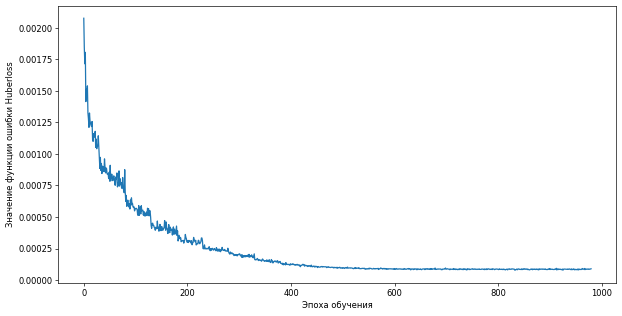

In [36]:
plt.figure(figsize=(12, 6), dpi=60)
plt.plot(loss_history[20:1000])
plt.xlabel('Эпоха обучения')  # Подпись оси X
plt.ylabel('Значение функции ошибки Huberloss')  # Подпись оси Y
plt.show()

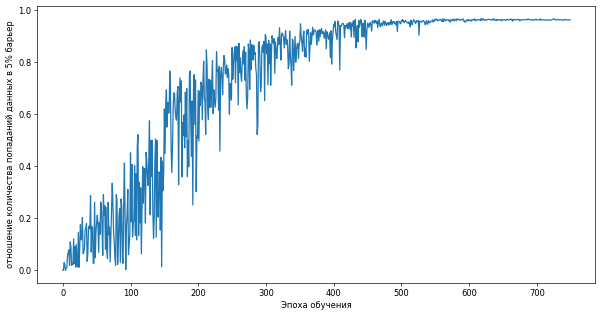

In [24]:
loss_mape,Loss_mape_test
plt.figure(figsize=(12, 6), dpi=60)
plt.plot(tube_loss_mape_test[:750])
plt.xlabel('Эпоха обучения')  # Подпись оси X
plt.ylabel('отношение количества попаданий данных в 5% барьер')  # Подпись оси Y
plt.show()

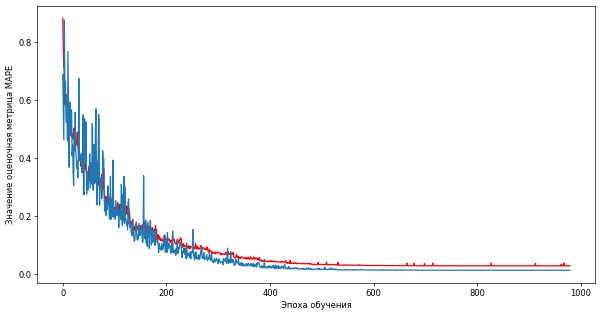

In [25]:
loss_mape,Loss_mape_test
plt.figure(figsize=(12, 6), dpi=60)
plt.plot(loss_mape[20:1000],color = 'r')
plt.plot(Loss_mape_test[20:1000])
plt.xlabel('Эпоха обучения')  # Подпись оси X
plt.ylabel('Значение оценочная метрица MAPE')  # Подпись оси Y
plt.show()

In [26]:
pred = model.forward(dataset['test_input']).to('cpu')

In [27]:
y_test_cpu = dataset['test_label'].to('cpu')

In [28]:
loss_data = torch.abs(y_test_cpu-pred)/y_test_cpu

In [29]:
loss_data.mean()

tensor(0.0137, grad_fn=<MeanBackward0>)

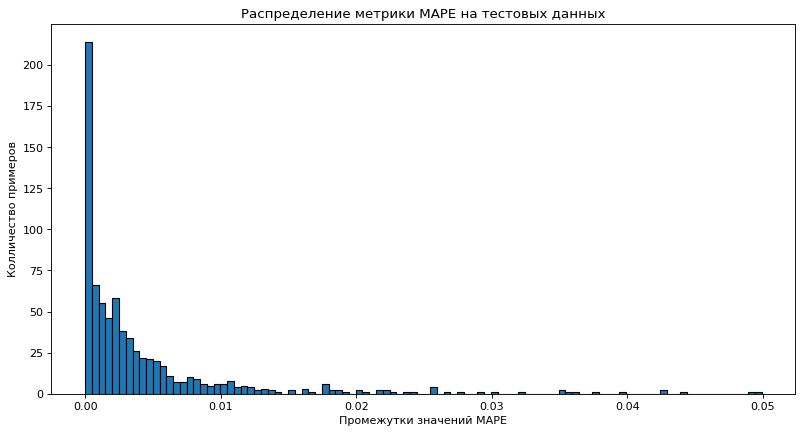

0.9620253164556962


In [38]:
# Convert loss_data to NumPy array
x = loss_data.detach().numpy()

all = x
chip = x[x<0.05]

plt.figure(figsize=(12, 6), dpi=80)
plt.hist(chip, bins=100, edgecolor='black')  # bins — количество корзин (можно настроить)
plt.xlabel('Промежутки значений MAPE')  # Подпись оси X
plt.ylabel('Колличество примеров')  # Подпись оси Y
plt.title('Распределение метрики MAPE на тестовых данных')  # Заголовок графика
plt.show()  # Отображение графика
print(len(chip)/len(all))

In [31]:
feature = 10
datset = feature_label(df,feature)

X,y = exit_Xy(datset,feature,device)

In [32]:
X.shape

torch.Size([2392, 19])

In [33]:
pred = model.forward(X).to('cpu').reshape(-1)

In [34]:
rt = np.array(df[0])[feature-1:]

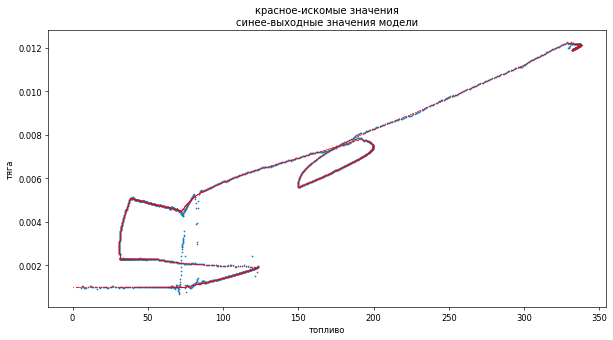

In [35]:
#plt.plot(df[0],df[1]) 
plt.figure(figsize=(12, 6), dpi=60)
plt.scatter(rt,pred.detach().numpy(),s=1) 
plt.scatter(df[0],df[1],color = 'r',s=0.1) 
plt.xlabel('топливо')  # Подпись оси X
plt.ylabel('тяга')  # Подпись оси Y
plt.title('красное-искомые значения\nсинее-выходные значения модели')  # Заголовок графика
plt.show()